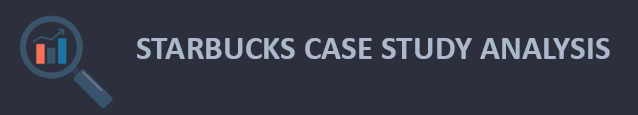

**TABLE OF CONTENTS**

1. [INTRODUCTION](#1-introduction)
2. [OVERVIEW OF THE DATA](#2-overview-of-the-data)
3. [ANALYSIS GOALS](#3-analysis-goals)
4. [METHODOLOGY](#4-methodology)  
   4.1. [DATA CLEANING](#41-data-cleaning)  
   4.2. [DATA TRANSFORMATION](#42-data-transformation)  
   4.3. [DATA ANALYSIS](#43-data-analysis)  
   4.3.1. [Understanding customer responses](#431-understanding-customer-responses)  
   4.3.2. [Identifying influencing factors](#432-identifying-influencing-factors)  
   4.3.3. [Customer Demographics Analysis](#433-customer-demographics-analysis)  
   4.4. [CUSTOMER SEGMENTATION](#44-customer-segmentation)
5. [RESULTS SUMMARY](#5-results-summary)
6. [ACTIONS AND RECOMMENDATIONS](#6-actions-and-recommendations)


<br><br><br>

**1.INTRODUCTION**  <a class="anchor" id="1-introduction"></a>

In this case study, I will analyze data provided by Starbucks during a promotional campaign. My objective is to understand customer responses to different offers, segment customers based on their behaviour and develop strategies for targeting specific deals to various customer segments. The ultimate goal is to boost revenue, increase customer loyalty, and enhance brand awareness. To achieve this, I will employ specific analytical methods to gain valuable insights based on the results obtained.

<br><br><br>

**2.OVERVIEW OF THE DATA** <a class="anchor" id="2-overview-of-the-data"></a>

Throughout the promotional month, various offers with different types, durations, rewards, and challenges were sent to 17,000 customers through multiple channels, including social media, email, mobile apps, and websites. Offers were distributed to customers at intervals over the course of the month, but not everyone received the same number. Most customers received between 3 to 5 offers, while some received none. The dataset captures customer responses to these offers, along with transactions made during the campaign. Events are recorded under three offer-related categories: offer received, offer viewed, and offer completed. Additionally, there's a transaction event, representing a customer's purchase. The timing of each event is noted in hours, starting from the launch of the first offer at time = 0 hours.


There are a total of three different data sets:

profile.xlsx(17000, 5) - Data about customers containg colums such as gender, age, id, became member on, income 
https://github.com/ChemuruLasya/Data-Files/blob/main/Starbucks%20Case%20Study%20Files/Starbucks_profile.xlsx


portfolio.xlsx(10,6) - Data about offers sent to customers having columns reward, channels, difficulty, duration, offer_type, id 
https://github.com/ChemuruLasya/Data-Files/blob/main/Starbucks%20Case%20Study%20Files/Starbucks_portfolio.xlsx

transcript.xlsx(306534, 4) - Data about customer responses to offers reffered as events in latter part of this anlysis and transactions made having columns such as person, event, value, time  
https://github.com/ChemuruLasya/Data-Files/blob/main/Starbucks%20Case%20Study%20Files/Starbucks_transcript.xlsx

<br><br><br>

**3.ANALYSIS GOALS** <a class="anchor" id="3-analysis-goals"></a>

1. **Understanding Customer Responses**: Analyzing how customers reacted to the various offers launched during the campaign.
  
2. **Identifying Influencing Factors**: Investigating the potential reasons behind different customer responses to the offers.

3. **Demographic Analysis**: Exploring the general demographics of the customers to understand the makeup of the customer base.

4. **Customer Segmentation and Value**: Segmenting the customers based on their behaviors and determining the value each segment brings to the company.

<br><br><br>

**4.METHODOLOGY**  <a class="anchor" id="4-methodology"></a>

**DATA CLEANING → DATA TRANSFORMATION → DATA ANALYSIS → CUSTOMER SEGMENTATION**

**4.1. Data Cleaning**

- **Dropped Unnecessary Columns**: Removed columns that were not useful for the analysis to reduce noise and focus on relevant data.
- **Handled Missing Values**: Checked for missing values and removed records with missing values to ensure the accuracy and reliability of the subsequent analysis.

**4.2. Data Transformation**

- **Created `offer_code` Column**: Introduced a new column called `offer_code` to simplify the identification of offers, as using the `offer_ID` was difficult.
- **Split Complex Columns**: Separated columns containing multiple strings into distinct columns to facilitate more efficient analysis.

**4.3. Data Analysis**

4.3.1.Understanding Customer Responses

- **Univariate Analysis on Event Data**: Performed an initial univariate analysis to understand customer interactions with offers.
- **Joined Transaction and Offer Data**: Merged transaction data with offer data to calculate overall offer completion and view rates.

4.3.2.Identifying Influencing Factors on Customer Responses

- **Analysis of Channels Used**: Examined the channels through which offers were delivered and how they impacted customer responses.
- **Offer Type and Customer Response**: Analyzed the influence of different offer types and the statistics associated with each to identify patterns in customer responses.

4.3.3.Performing Analysis on Customer Demographics

- **Demographic Insights**: Identified key demographics such as gender and age distribution.
- **Bivariate Analysis of Income vs. Age**: Explored the relationship between income and age.
- **Starbucks Membership Analysis**: Investigated membership patterns over time (yearly, monthly, and weekday trends) to identify additional factors influencing customer behavior beyond the offers.

**4.4.Customer Segmentation**

- **Clustering Customers**: Used the K-Means clustering algorithm to segment customers based on their value to the company, utilizing transactions and events data.
- **Validation and Metrics**: Cross-validated clustering results with Logistic Regression and KNN algorithms, identified key metrics for each cluster, and named the clusters accordingly.
- **Demographic Analysis of Clusters**: Merged the clustering results with customer data to explore the basic demographics of each segment.


<br><br><br>

**  **

IMPORTING NECESSARY LIBRARIES

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install sckit-learnfd
#!pip install seaborn

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
#Adding background color to my plots
#plt.style.use('seaborn-v0_8-dark')

In [4]:
%matplotlib inline

KNOWING THE GIVEN DATA SETS

In [5]:
df_profile=pd.read_csv("profile.csv")
df_profile.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [7]:
df_portfolio=pd.read_csv("portfolio.csv")
df_portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [8]:
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [9]:
df_transcript=pd.read_csv("transcript.csv")
df_transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [10]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


<br>

**4.1.DATA CLEANING** <a class="anchor" id="41-data-cleaning"></a>

Dropping unuseful columns

In [11]:
df_portfolio = df_portfolio.drop(columns=['Unnamed: 0']).dropna(axis=1)
df_profile = df_profile.drop('Unnamed: 0', axis = 1)
df_transcript= df_transcript.drop('Unnamed: 0', axis = 1)

Checking for missing values

In [12]:
df_profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [13]:
df_portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [14]:
df_transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

<p style="color:blue; font-size:14px; font-family:Verdana;">From the above we can see that there are 2175 missing values in gender and income columns. Let us check whether they are from the same rows.</p>

In [15]:
rows_with_missing_gender = df_profile[df_profile['gender'].isna()]
rows_with_missing_income = df_profile[df_profile['income'].isna()]

np.sum(rows_with_missing_gender['id'] == rows_with_missing_income['id'])

2175

<p style="color:blue; font-size:14px; font-family:Verdana;">Thus, it is confirmed that both missing gender and missing income values are from the same records, income plays a major role in customer behaviour. Out of 17,000 rows, 2,175 rows account for 12.7%. Removing them is not an ideal option, but replacing them with NaNs or zeroes would skew our analysis. Since, there are enough records for analysis, rows with missing income values can be removed.</p>

In [16]:
cleaned_profile_data = df_profile.drop(df_profile[df_profile['id'].isin(rows_with_missing_income['id'])].index).reset_index(drop=True)
print(cleaned_profile_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB
None


<br>

**4.2.DATA TRANSFORMATION** <a class="anchor" id="42-data-transformation"></a>

<p style="color:blue; font-size:12px; font-family:Verdana;">Identifying offer types by their lengthy IDs is quite difficult, so let's use short code names to label the different offers.</p>

In [17]:
# Sort df offers
df_portfolio = df_portfolio.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add column `offer_code` for this new Offer Short code Name
from string import ascii_uppercase
df_portfolio['offer_code'] = [ascii_uppercase[i] for i in range(df_portfolio.shape[0])]
df_portfolio

,reward,channels,difficulty,duration,offer_type,id,offer_code
0,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,A
1,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,B
2,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,C
3,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,D
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,E
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,F
6,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,G
7,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,H
8,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,I
9,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,J


<p style="color:blue; font-size:12px; font-family:Verdana;">In the transcripts DataFrame, the `value` column contains strings with two values, making it difficult to perform any analysis. Let's first convert it into a dictionary and then extract the keys and values into two separate columns.</p>

In [18]:
# Elements in value_columns are strings. Convert them to dictionaries
value_column = df_transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [19]:
# Extract the keys and values
dictionary_key_column = value_column.apply(lambda x: next(iter(x.keys())))
dictionary_value_column = value_column.apply(lambda x: next(iter(x.values())))

In [20]:
# Create a df containing the keys and values of the dictionary elements of 'value' column
split_column = pd.DataFrame(columns = ['dict_key', 'dict_value'])
split_column['dict_key'] = dictionary_key_column
split_column['dict_value'] = dictionary_value_column
split_column.head(5)

,dict_key,dict_value
0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer id,2906b810c7d4411798c6938adc9daaa5
3,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0


In [21]:
# Replacing `value` column with new split columns and then reordering the columns
df_transcript_new = df_transcript.drop('value', axis = 1)
df_transcript_new = pd.concat([df_transcript_new, split_column], axis = 1)

column_names = ['person', 'event', 'dict_key', 'dict_value', 'time']
df_transcript_new = df_transcript_new[column_names]
df_transcript_new.sample(5)

,person,event,dict_key,dict_value,time
173870,78263466042f4dfa91bd390107158277,offer viewed,offer id,2298d6c36e964ae4a3e7e9706d1fb8c2,420
253294,4225e40a26b24128890708144eab8a5e,offer received,offer id,2298d6c36e964ae4a3e7e9706d1fb8c2,576
43236,4de38d89a91c4286a583085d909817f9,offer completed,offer_id,fafdcd668e3743c1bb461111dcafc2a4,108
100981,a808292dd9d74925a016793b61c1ae8c,transaction,amount,10.62,276
185440,63674022d72c4993a8f6c5edcbf01dcc,transaction,amount,4.9,450


<br><br>

**4.3.DATA ANALYSIS**  <a class="anchor" id="43-data-analysis"></a>

**4.3.1.Understanding Customer Responses** <a class="anchor" id="431-understanding-customer-responses"></a>

In [22]:
offer_data = df_portfolio.copy()

In [23]:
transcripts = df_transcript_new.copy()

In [24]:
enhanced_transcripts = transcripts.copy()

# Create a new column 'days_since_start' by converting 'time' to days and casting to integer
enhanced_transcripts['days_since_start'] = (enhanced_transcripts['time'] / 24).astype('int64')

min_days, max_days = enhanced_transcripts['days_since_start'].min(), enhanced_transcripts['days_since_start'].max()
print(f'The minimum and maximum of column days_since_start: {min_days} and {max_days}')

The minimum and maximum of column days_since_start: 0 and 29


<p style="color:blue; font-size:14px; font-family:Verdana;">This means that the campaign lasted about one month.</p>

<p style="color:orange; font-size:16px;">Univariate Analysis on Event data</p>

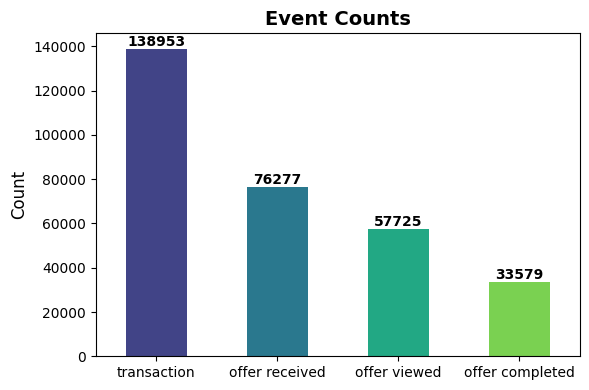

In [25]:
# Plotting the event counts
fig, ax = plt.subplots(figsize=(6, 4))
event_counts = transcripts['event'].value_counts()
bars = event_counts.plot(kind='bar', color=sns.color_palette('viridis', len(event_counts)), ax=ax)

# Adding counts on top of each bar
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_height())}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customizing the x and y labels and title
ax.set_xticklabels(event_counts.index, rotation=0, fontsize=10)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Event Counts', fontsize=14, fontweight='bold')

%matplotlib inline 

# Display the plot
plt.tight_layout()
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">Key Observations:

<p style="color:blue; font-size:14px; font-family:Verdana;">Transaction Volume: The dataset contains 138,953 transactions, which is more than four times the number of completed offers (33,579). This indicates that a significant portion of customers made multiple purchases without relying on promotional offers. This suggests strong customer loyalty and frequent purchasing behavior, which is expected given Starbucks' product offerings, such as coffee and snacks, that are typically fast-moving consumer goods (FMCG).

<p style="color:blue; font-size:14px; font-family:Verdana;">Offer Engagement: Throughout the campaign, customers received a total of 76,277 offers. Of these, 76% (57,725) were viewed, showing a substantial engagement rate. This suggests that the promotional materials were effective in capturing customers' attention, possibly due to compelling slogans or well-targeted messaging.

<p style="color:blue; font-size:14px; font-family:Verdana;">Offer Completion: The campaign saw 33,579 offers completed, representing 58% of viewed offers and 44% of all offers distributed. This relatively high completion rate indicates strong customer participation and suggests that the offers were appealing enough to encourage action. It also hints at the presence of a loyal customer base that frequently engages with Starbucks' promotions.</p>

**  **

In [26]:
# Filter out transactions to create a DataFrame containing only offer-related events
df_event = transcripts[transcripts['event'] != 'transaction']

# Merge df_event with offer_data on the 'dict_value' column from df_event and 'id' column from offer_data
offer_event_data = pd.merge(df_event, offer_data, left_on='dict_value', right_on='id').drop(columns='id')
offer_event_data.sample(3)

,person,event,dict_key,dict_value,time,reward,channels,difficulty,duration,offer_type,offer_code
75260,4e31b61bc1514801aac0dce9920ef365,offer received,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,408,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,D
34319,d4b0ddab9db746ecbc848f30b2df7b07,offer viewed,offer id,2906b810c7d4411798c6938adc9daaa5,192,2,"['web', 'email', 'mobile']",10,7,discount,G
50033,750668ec40b54828a3712880f6236fea,offer received,offer id,fafdcd668e3743c1bb461111dcafc2a4,168,2,"['web', 'email', 'mobile', 'social']",10,10,discount,F


In [27]:
# Define the new column order
column_order = ['person', 'event', 'offer_code', 'reward',
                    'channels', 'difficulty', 'duration', 
                    'offer_type', 'time', 'dict_key']

# Reorder the columns in the DataFrame
offer_event_data = offer_event_data[column_order]

# Drop the 'dict_key' column
offer_event_data = offer_event_data.drop(columns='dict_key')

# Display a random sample of 3 rows from the DataFrame
offer_event_data.sample(3)

,person,event,offer_code,reward,channels,difficulty,duration,offer_type,time
33887,f924927e7f844ecebf87eef93f4d2688,offer viewed,G,2,"['web', 'email', 'mobile']",10,7,discount,168
22698,78e9be059fce46a1b610f74e0e812a4a,offer received,H,5,"['web', 'email']",20,10,discount,408
93270,d819428f44234b24a1851503756bc537,offer viewed,B,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,384


<p style="color:Orange; font-size:16px;">Finding overall completion rate and view rate of the offers</p>

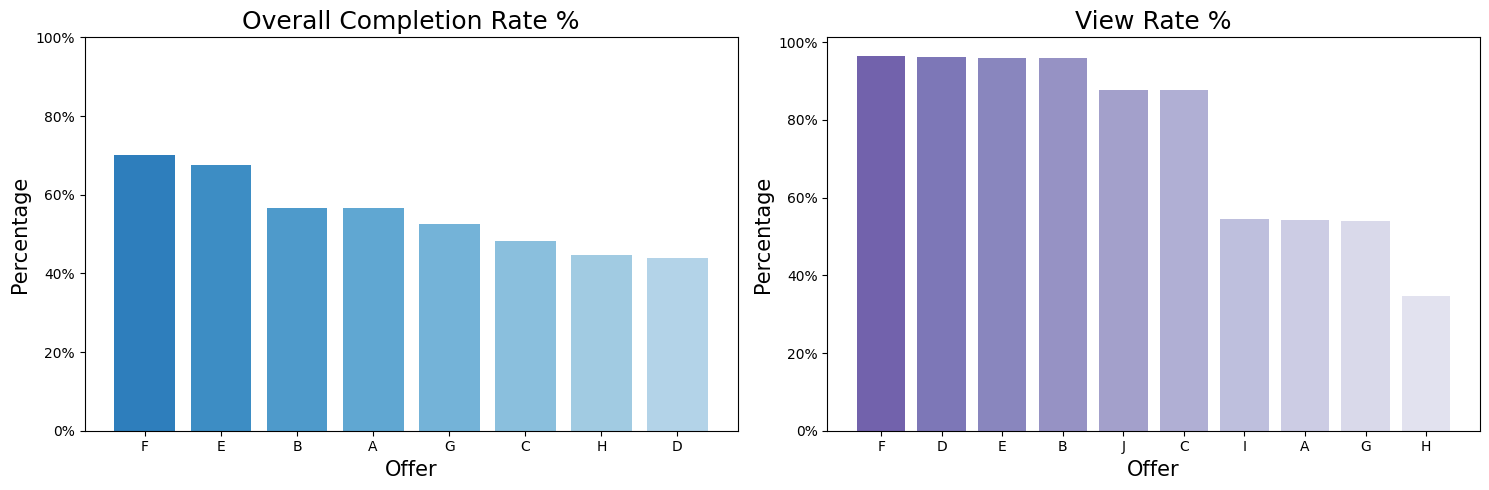

In [28]:
# Filter events where the offer was received
offers_received = offer_event_data.query('event == "offer received"')
received_counts = offers_received['offer_code'].value_counts().sort_values(ascending=False)

# Filter events where the offer was completed
offers_completed = offer_event_data.query('event == "offer completed"')
completed_counts = offers_completed['offer_code'].value_counts().sort_values(ascending=False)

# Filter events where the offer was viewed
offers_viewed = offer_event_data.query('event == "offer viewed"')
viewed_counts = offers_viewed['offer_code'].value_counts().sort_values(ascending=False)

# Calculate overall completion rate for each offer
overall_completion_rate = (completed_counts.sort_index() / received_counts.sort_index()).sort_values(ascending=False)

# Calculate view rate for each offer
view_rate = (viewed_counts.sort_index() / received_counts.sort_index()).sort_values(ascending=False)

# Create a figure with 2 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot overall completion rate
cmap = plt.get_cmap('Blues_r')
n = len(overall_completion_rate)
colors = cmap(np.linspace(0.3, 0.8, n))
axes[0].bar(x=overall_completion_rate.index, height=overall_completion_rate.values, color=colors)
axes[0].set_title('Overall Completion Rate %', fontsize=18)
axes[0].set_xlabel('Offer', fontsize=15)
axes[0].set_ylabel('Percentage', fontsize=15)
axes[0].set_yticks(np.arange(0, 1.2, 0.2))
axes[0].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# Plot view rate
cmap = plt.get_cmap('Purples_r')
n = len(view_rate)
colors = cmap(np.linspace(0.3, 0.8, n))
axes[1].bar(x=np.arange(len(view_rate)), height=view_rate.values, tick_label=view_rate.index.values, color=colors)
axes[1].set_title('View Rate %', fontsize=18)
axes[1].set_xlabel('Offer', fontsize=15)
axes[1].set_ylabel('Percentage', fontsize=15)
axes[1].set_yticks(np.arange(0, 1.2, 0.2))
axes[1].set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

plt.tight_layout()
plt.show()


<p style="color:blue; font-size:14px; font-family:Verdana;">Key Observations: 

<p style="color:blue; font-size:14px; font-family:Verdana;">1. Top-Performing Offers: The most successful offers were Offer F, Offer E, and Offer B, which saw overall completion rates of 70%, 68%, and 56%, respectively. This indicates that these offers resonated well with customers, driving significant engagement and completion.

<p style="color:blue; font-size:14px; font-family:Verdana;">2. Least Popular Offer: Offer D had the lowest performance, with a completion rate of approximately 44%. This suggests that this particular offer may not have been as appealing or relevant to customers, resulting in lower engagement compared to other promotions.

<p style="color:blue; font-size:14px; font-family:Verdana;">3.  In the view rate plot we can clearly observe that there are 4 different levels in height, seperating the offers into four groups.

<p style="color:blue; font-size:14px; font-family:Verdana;">4.  Offers that achieved a high completion rate do not necessarily have a high view rate.

<p style="color:blue; font-size:14px; font-family:Verdana;">Note: Offers I and J are informational so they do not have an event offer_completed</p>

<br>

**4.3.2.Identifying influencing factors** <a class="anchor" id="432-identifying-influencing-factors"></a>

<p style="color:orange; font-size:16px;">Univariate Analysis on channels

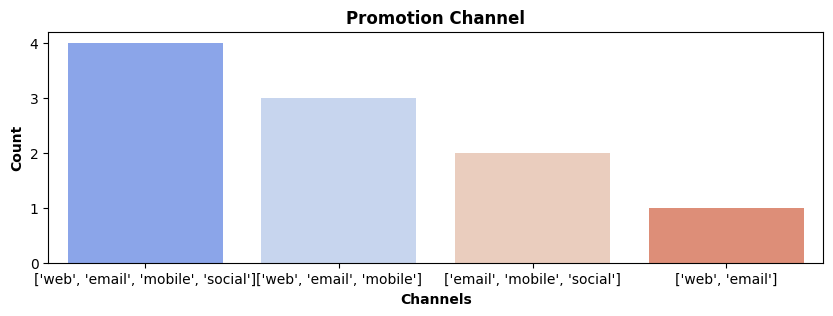

In [29]:
# Compute the counts for channels 
channel_counts = offer_data['channels'].value_counts()

# Set up the figure and axis
plt.figure(figsize=(10, 3))

# Create the bar plot with a different color palette
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='coolwarm')

# Customize the x and y ticks
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Label the axes and the title
plt.xlabel('Channels', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Promotion Channel', fontsize=12, fontweight='bold')


# Display the plot
plt.show()


<p style="color:blue; font-size:14px; font-family:Verdana;">A significant insight is revealed here: the four distinct levels observed in the view rate plot align with four different combinations of channels used for sending offers.</p>

<p style="color:blue; font-size:14px; font-family:Verdana;">- Group 1(Offers F, D, E, B): This group utilized a combination of email, mobile, social media, and web platforms, achieving the highest view rate of approximately 96%.</p>
<p style="color:blue; font-size:14px; font-family:Verdana;">-Group 2(Offers J, C): These offers were promoted via email, mobile, and social media platforms, resulting in a view rate of 90%.</p>
<p style="color:blue; font-size:14px; font-family:Verdana;">-Group 3(Offers I, A, G): This group used email, mobile, and web platforms, with a view rate of 55%.</p>

<p style="color:blue; font-size:14px; font-family:Verdana;">-Group 4(Offer H): This offer relied on email and web platforms, leading to a view rate of 36%.</p>

<p style="color:blue; font-size:14px; font-family:Verdana;">From this analysis, we can conclude that the effectiveness of promotional channels, in terms of view rate, follows the order:</p>  
<p style="color:red; font-size:16px; font-family:Verdana;">Social Media > Email >= Mobile > Websites.</p>


In [30]:
# Create a new df to hold the relavent variables of offers
offers_with_rates = offer_data.assign(view_rate = view_rate.sort_index().values,
                            complete_rate = overall_completion_rate.sort_index().values)

In [31]:
# Set `offer_alias` as index
offers_with_rates.set_index('offer_code', inplace = True)

In [32]:
# Derive numeric columns, offer_type from offers_with_rates table to identify their effects on offer completion and view rate
offers_stats = offers_with_rates[['reward', 'difficulty', 'duration', 'offer_type', 'view_rate', 'complete_rate']]
offers_stats

,reward,difficulty,duration,offer_type,view_rate,complete_rate
offer_code,,,,,,
A,5,5,7,bogo,0.543311,0.567149
B,5,5,5,bogo,0.959451,0.567428
C,10,10,7,bogo,0.876991,0.481588
D,10,10,5,bogo,0.961148,0.438694
E,3,7,7,discount,0.959587,0.674340
F,2,10,10,discount,0.964460,0.699882
G,2,10,7,discount,0.539570,0.526336
H,5,20,10,discount,0.347287,0.446009
I,0,0,4,informational,0.544046,NaN


<p style="color:blue; font-size:14px; font-family:Verdana;">Key Insights</p>
<p style="color:blue; font-size:14px; font-family:Verdana;">1.  It is evident that the offers with the highest completion rates, F and E, are discount offers.</p>
<p style="color:blue; font-size:14px; font-family:Verdana;">2.  Despite having a good view rate, Offers C and D, which are "Buy One Get One" deals, show lower completion rates, suggesting that customers may not favor this type of promotion.</p>
<p style="color:blue; font-size:14px; font-family:Verdana;">3.  Offers B and A, also "Buy One Get One" deals, maintain respectable completion rates. Their lower difficulty level seems to positively impact their performance.</p>
<p style="color:blue; font-size:14px; font-family:Verdana;">4.  Overall, the duration of an offer appears to positively influence its completion rate.</p>
<p style="color:blue; font-size:14px; font-family:Verdana;">5.  The reward size does not seem to significantly affect the completion rate.</p>

<br>

**4.3.3.Customer Demographics Analysis**  <a class="anchor" id="433-customer-demographics-analysis"></a>

In [33]:
customers = cleaned_profile_data.copy()

<p style="color:orange; font-size:16px;">Conducting univariate analysis on gender,age of customers

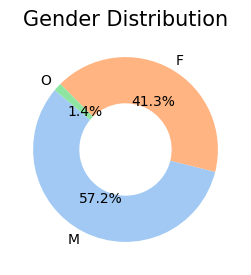

In [34]:
# Conducting univariate analysis on gender of customers
gender_counts = customers['gender'].value_counts()
gender_labels = gender_counts.index

plt.figure(figsize=(6,3))
plt.pie(gender_counts, labels=gender_labels, colors=sns.color_palette('pastel'),
        autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.5))

plt.title('Gender Distribution', fontsize=15)
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


<p style="color:blue; font-size:14px; font-family:Verdana;">There are more males(57.2 %) compared to females(41.3 %) and a small percentage of other gender(1.4 %)

In [35]:
# Displaying the descriptive statistics of age
print(customers['age'].describe())

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


In [36]:
# Displaying the descriptive statistics of income
print(customers['income'].describe())

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


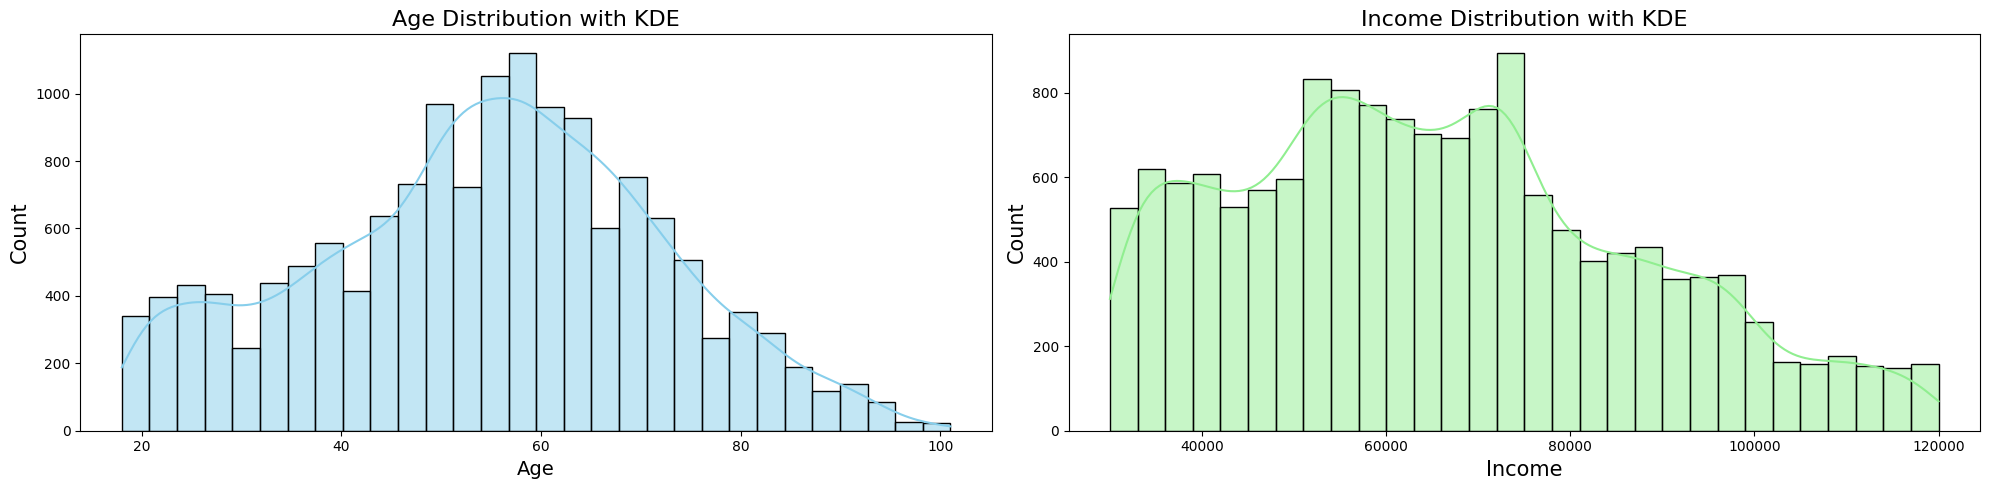

In [37]:
# Create a figure with 2 subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Plot KDE with histogram to show count for Age
sns.histplot(x='age', data=customers, kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Count', fontsize=15)
axes[0].set_title('Age Distribution with KDE', fontsize=16)

# Plot KDE with histogram to show count for Income
sns.histplot(x='income', data=customers, kde=True, color='lightgreen', bins=30, ax=axes[1])
axes[1].set_xlabel('Income', fontsize=15)
axes[1].set_ylabel('Count', fontsize=15)
axes[1].set_title('Income Distribution with KDE', fontsize=16)

plt.tight_layout()
plt.show()

<p style="color:Orange; font-size:16px;">Dividing customers into age groups

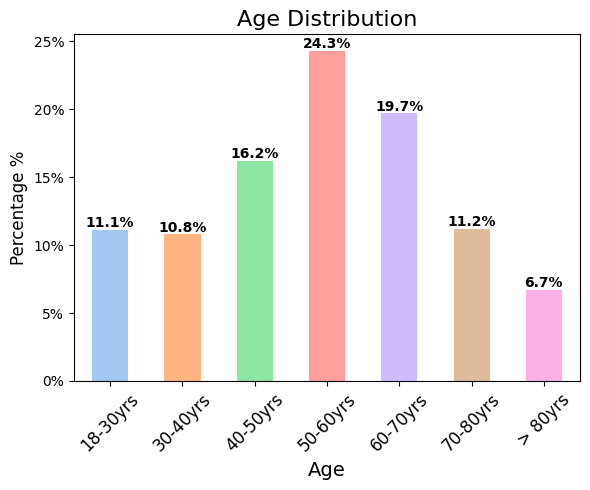

In [38]:
# Create a new column `age_group`
customers = cleaned_profile_data.copy()

# Create a new column `age_group` using pd.cut
bins = [customers['age'].min(), 30, 40, 50, 60, 70, 80, customers['age'].max()]
labels = ['18-30yrs', '30-40yrs', '40-50yrs', '50-60yrs', '60-70yrs', '70-80yrs', '> 80yrs']
customers['age_group'] = pd.cut(customers['age'], bins=bins, labels=labels)

# Visualize customers by age groups
age_group_percentage = (customers['age_group'].value_counts(normalize=True).sort_index() * 100).round(1)
fig, ax = plt.subplots(figsize=(6, 5))

colors = sns.color_palette('pastel')
age_group_percentage.plot(kind='bar', ax=ax, color=colors)

yticks = np.arange(0, 30, 5)
yticklabels = [str(y) + '%' for y in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=10)
ax.set_xticklabels(age_group_percentage.index, rotation=45, fontsize=12)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Percentage %', fontsize= 12)
ax.set_title('Age Distribution', fontsize=16)

# Display percentage on top of bars
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
            f'{age_group_percentage.iloc[i]}%', 
            ha='center', weight='bold', fontsize=10)

plt.tight_layout()
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">Observations:

<p style="color:blue; font-size:14px; font-family:Verdana;">The largest customer age group is 50-60 years (24.3%), followed by 60-70 years (19.7%), and 40-50 years (16.2%).
<p style="color:blue; font-size:14px; font-family:Verdana;">These top three age groups collectively account for 60.2% of the total customer base.

<p style="color:blue; font-size:14px; font-family:Verdana;">Starbucks might appeal more to older age groups due to factors such as higher disposable income, established brand loyalty, and a preference for premium coffee and dining experiences.
<p style="color:blue; font-size:14px; font-family:Verdana;">The brand's ambiance and product offerings may resonate well with middle-aged and older adults who value quality and a relaxing environment.
<p style="color:blue; font-size:14px; font-family:Verdana;">It may also have provided a convenient and familiar setting for socializing, work, or relaxation, which aligns with the lifestyle of these age groups.</p>

<p style="color:Orange; font-size:16px;">Dividing customers into income groups

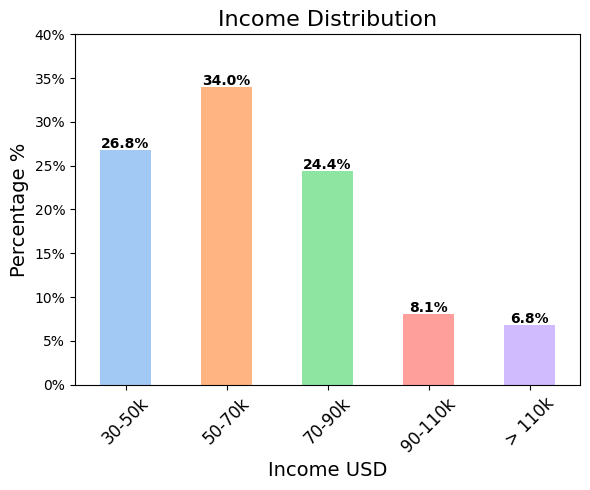

In [39]:
# Create a new column `income_group`
income_bins = [customers['income'].min(), 50000, 70000, 90000, 100000, customers['income'].max()]
income_labels = ['30-50k', '50-70k', '70-90k', '90-110k','> 110k']
customers['income_group'] = pd.cut(customers['income'], bins=income_bins, labels=income_labels)

# Visualize customers by income groups
income_group_percentage = (customers['income_group'].value_counts(normalize=True).sort_index() * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 5))

colors = sns.color_palette('pastel')
income_group_percentage.plot(kind='bar', ax=ax, color=colors)

yticks = np.arange(0, 45, 5)
yticklabels = [str(y) + '%' for y in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=10)
ax.set_xticklabels(income_group_percentage.index, rotation=45, fontsize=12)
ax.set_xlabel('Income USD', fontsize=14)
ax.set_ylabel('Percentage %', fontsize=14)
ax.set_title('Income Distribution', fontsize=16)

# Display percentage on top of bars
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
            f'{income_group_percentage.iloc[i]}%', 
            ha='center', weight='bold', fontsize=10)

plt.tight_layout()
plt.show()


<p style="color:blue; font-size:14px; font-family:Verdana;">Observations:

<p style="color:blue; font-size:14px; font-family:Verdana;">A significant portion of customers earn an income ranging between $50,000 and $70,000, followed by those earning $30,000 to $50,000 and $70,000 to $90,000.

<p style="color:blue; font-size:14px; font-family:Verdana;">The $50,000 to $70,000 income range likely represents customers who can comfortably afford Starbucks' premium products without perceiving them as overly expensive.


<p style="color:orange; font-size:16px;">Bivariate analysis on income vs age

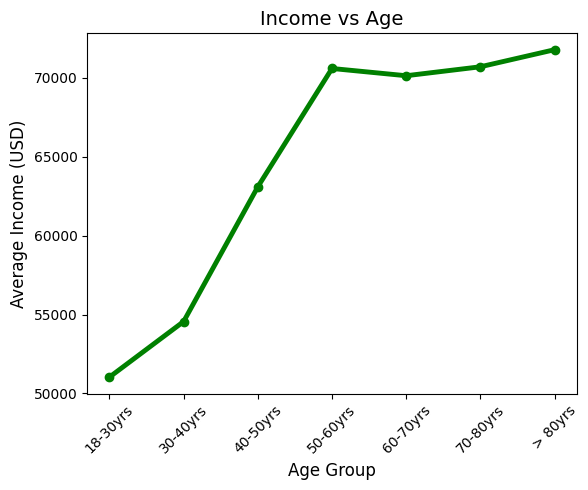

In [40]:
# Create a new column `age_group` using pd.cut
if 'age_group' not in customers.columns:
    bins = [customers['age'].min(), 30, 50, 70, 56, 66, 76, 86, customers['age'].max()]
    labels = ['18-30ys', '30-40ys', '40-50ys', '50-60ys', '60-70ys', '70-80ys', '> 80ys']
    customers['age_group'] = pd.cut(customers['age'], bins=bins, labels=labels)

# Aggregate data: mean income by age group
age_group_income = customers.groupby('age_group')['income'].mean().sort_index()

# Plot
plt.figure(figsize=(6, 5))
plt.plot(age_group_income.index, age_group_income.values, marker='o', linestyle='-', color='green', linewidth= 3.5)

# Setting labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Income (USD)', fontsize=12)
plt.title('Income vs Age', fontsize=14)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">Key Observations

<p style="color:blue; font-size:14px; font-family:Verdana;">1. Steady Increase in Income with Age:
   The graph shows a clear trend where average income increases with age, peaking in the 50-60 years age group. This suggests      that as people grow older, their income tends to rise, likely due to career progression, accumulated experience, and higher-    paying positions.

<p style="color:blue; font-size:14px; font-family:Verdana;">2. Income Plateau After 60:
   After reaching the peak in the 50-60 years age group, the average income appears to plateau or slightly decrease for those in    the 60-70 years age group. This may indicate that many individuals in this age range are transitioning into retirement,          leading to a reduction in income.

<p style="color:blue; font-size:14px; font-family:Verdana;">3. Stable Income in Older Age Groups:
   The slight increase in average income for the 70-80 years and above 80 years age groups could be attributed to retirement        benefits, pensions, or other forms of passive income that sustain their earnings at a relatively stable level.

<p style="color:blue; font-size:14px; font-family:Verdana;">4. Lower Income in Younger Age Groups:
   The lowest average income is observed in the 18-30 years age group, which is expected as this group consists mostly of          individuals who are early in their careers or still completing their education.

<p style="color:blue; font-size:14px; font-family:Verdana;">Implications for Starbucks:

<p style="color:blue; font-size:14px; font-family:Verdana;">The data suggests that Starbucks' primary customer base, in terms of income, might be those in the 50-60 years age group, as they have the highest average income and are likely to spend more on premium products. However, the 60-70 years age group, despite the slight dip, still holds significant purchasing power, making them a key demographic as well.

<p style="color:orange; font-size:16px;">Univariate analysis on Became member on

In [41]:
# Select the df_member dataframe
df_member = customers[['id', 'became_member_on']].copy()

# Convert the 'became_member_on' column to datetime format
df_member['became_member_on'] = pd.to_datetime(df_member['became_member_on'], format='%Y%m%d')

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(
    year=df_member.became_member_on.dt.year,
    month=df_member.became_member_on.dt.month,
    day=df_member.became_member_on.dt.day,
    month_name=df_member.became_member_on.dt.month_name(),
#day_of_week=df_member.became_member_on.dt.weekday,
    day_name=df_member.became_member_on.dt.day_name()
)

# Displaying the first three rows of the modified dataframe
df_member.head(3)

,id,became_member_on,year,month,day,month_name,day_name
0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,2017,7,15,July,Saturday
1,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,Tuesday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,Thursday


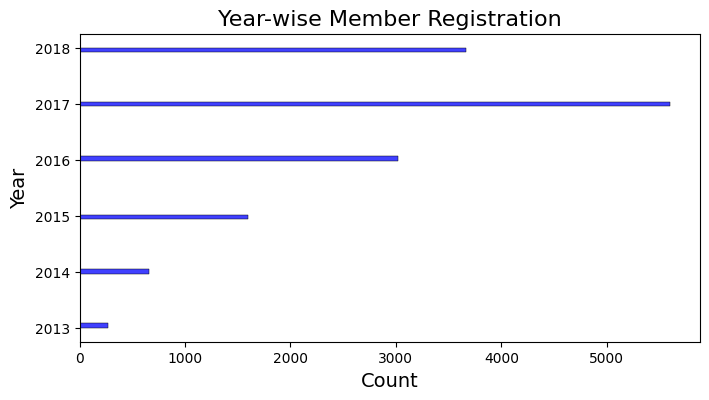

In [42]:
# Visualizing year-wise member registration
plt.figure(figsize=(8, 4))
sns.histplot(data=df_member.sort_values('year'), y='year', kde=False, color='blue')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.title('Year-wise Member Registration', fontsize=16)
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">The graph shows a clear upward trend in member registrations over the years from 2013 to 2017, with 2017 having the highest number of registrations. This suggests that Starbucks’ membership program gained increasing popularity during this period.

<p style="color:blue; font-size:14px; font-family:Verdana;">The year 2017 stands out with a peak in registrations, indicating a possible successful marketing campaign or promotional strategy that attracted a large number of new members. This could also reflect broader customer engagement or the introduction of new features that appealed to customers.

<p style="color:blue; font-size:14px; font-family:Verdana;">There is a slight drop in registrations in 2018 compared to 2017, which could indicate market saturation or a reduction in the effectiveness of promotional activities. Alternatively, it might reflect a shift in the company’s strategy, focusing more on retaining existing members rather than acquiring new ones.

<p style="color:blue; font-size:14px; font-family:Verdana;">The low registration numbers from 2013 to 2015 suggest that the membership program might have been in its early stages or that awareness among customers was still growing. The gradual increase after 2014 indicates that the program started gaining traction, possibly due to improvements or increased marketing efforts.

<p style="color:blue; font-size:14px; font-family:Verdana;">Implications for Starbucks:
<p style="color:blue; font-size:14px; font-family:Verdana;">   - Understanding the factors that led to the peak in 2017 could help Starbucks replicate that success in future years. Additionally, the slight decline in 2018 suggests that Starbucks may need to explore new strategies or incentives to maintain and grow its membership base.

<p style="color:orange; font-size:16px;">Daily memebers growth

In [43]:
print(f"The earliest membership date is: {df_member['became_member_on'].min()} and the latest membership date is: {df_member['became_member_on'].max()}")

The earliest membership date is: 2013-07-29 00:00:00 and the latest membership date is: 2018-07-26 00:00:00


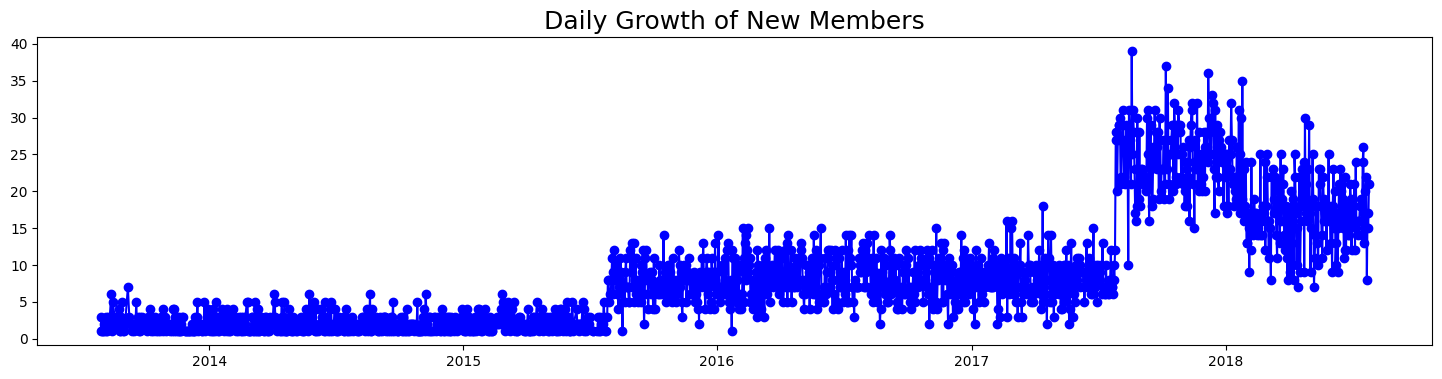

In [44]:
# Create a time series with the number of new members on each day
daily_new_members = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index=daily_new_members.index.values, data=daily_new_members.values, columns=['Number of New Members'])

# Generate a line plot
plt.figure(figsize=(18, 4))
plt.plot(df_member_growth.index, df_member_growth['Number of New Members'], marker='o', linestyle='-', color='blue')
plt.title('Daily Growth of New Members', fontsize=18)
#plt.xlabel('Date', fontsize=14)
#plt.ylabel('Number of New Members', fontsize=14)
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">The daily growth of new members shows a significant upward trend starting from late 2016, with marked spikes in mid 2017 to 2018, indicating successful membership drives or promotional efforts during these periods.

<p style="color:orange; font-size:16px;">Member growth by month

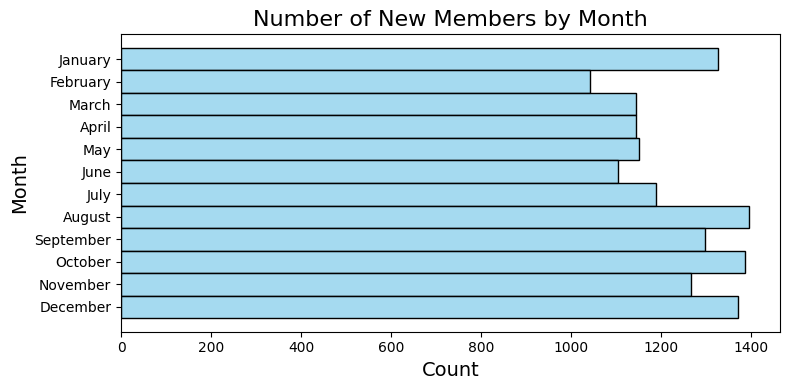

In [85]:

plt.figure(figsize=(8, 4))
sns.histplot(data=df_member.sort_values('month'), y='month_name', kde=False, color='skyblue')
plt.title('Number of New Members by Month', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.tight_layout()
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">Observations:

<p style="color:blue; font-size:14px; font-family:Verdana;">1.   December and January have the highest number of new member registrations, indicating a strong influence of the holiday season and New Year on customer sign-ups.
<p style="color:blue; font-size:14px; font-family:Verdana;">2.   February has the lowest number of registrations, suggesting that it may be a less popular month for new members compared to other times of the year.
<p style="color:blue; font-size:14px; font-family:Verdana;">3.   July and August show a peak in registrations, likely due to summer promotions or increased leisure activities.

<p style="color:orange; font-size:16px;">Member growth by weekday

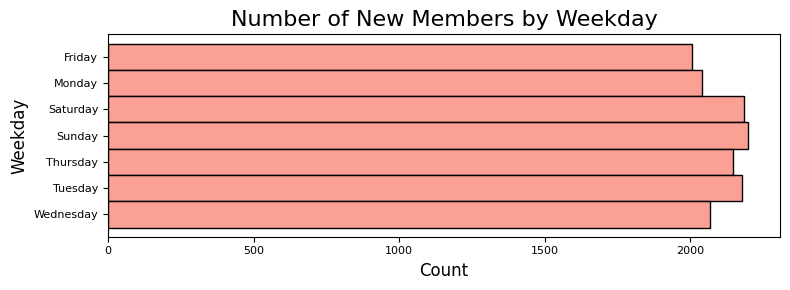

In [86]:


plt.figure(figsize=(8, 3))
sns.histplot(data=df_member.sort_values('day_name'), y='day_name', kde=False, color='salmon')
plt.title('Number of New Members by Weekday', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Weekday', fontsize=12)
plt.tight_layout()
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">As expected, there were maximum growth in new members during the weekends. On weekdays tuesday is having more new member registrations.

<br>

**4.4.CUSTOMER SEGMENTATION**  <a class="anchor" id="44-customer-segmentation"></a>

<p style="color:Orange; font-size:16px;">The segmentation of customers will be based on their transactional activities throughout the campaign month. Key features extracted for each customer include the total number of offers received, the number of offers viewed, the number of offers completed, the number of transactions made during the campaign period, and the overall expenditure. To segment the customers effectively, K-Means clustering will be employed. The optimal number of clusters will be determined using the Elbow method along with Silhouette scores.

<p style="color:Orange; font-size:16px;">To interpret the resulting clusters, essential metrics will be calculated for each group, such as the Average Purchase Value (APV), purchase frequency, the overall rate of offer completion, and offer sensitivity. This approach will provide a detailed understanding of the behavioral patterns within each cluster, enabling the assignment of descriptive labels to each segment.

In [47]:
# Create an empty df with columns needed
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])


In [48]:
# Remove rows of customers with missing gender and income
id_to_remove = rows_with_missing_income['id']
transcripts_filtered = transcripts[~transcripts['person'].isin(id_to_remove)].reset_index(drop = True)

In [49]:
# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values

In [50]:
# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()

In [51]:
# Set `person` as index for easy slicing
customer_behavior.set_index('person', inplace = True)

In [52]:
# Initialize columns with NaN
customer_behavior['num_received'] = np.nan
customer_behavior['num_viewed'] = np.nan
customer_behavior['num_completed'] = np.nan
customer_behavior['num_transactions'] = np.nan

# Efficiently update counts using boolean indexing and the loc method
received_mask = transcripts_grouped.index.get_level_values(1) == 'offer received'
viewed_mask = transcripts_grouped.index.get_level_values(1) == 'offer viewed'
completed_mask = transcripts_grouped.index.get_level_values(1) == 'offer completed'
transaction_mask = transcripts_grouped.index.get_level_values(1) == 'transaction'

# Update the columns only where events occurred, leaving others as NaN
customer_behavior.loc[transcripts_grouped[received_mask].index.get_level_values(0), 'num_received'] = transcripts_grouped[received_mask]['dict_key'].values
customer_behavior.loc[transcripts_grouped[viewed_mask].index.get_level_values(0), 'num_viewed'] = transcripts_grouped[viewed_mask]['dict_key'].values
customer_behavior.loc[transcripts_grouped[completed_mask].index.get_level_values(0), 'num_completed'] = transcripts_grouped[completed_mask]['dict_key'].values
customer_behavior.loc[transcripts_grouped[transaction_mask].index.get_level_values(0), 'num_transactions'] = transcripts_grouped[transaction_mask]['dict_key'].values

# Calculate how much money each customer spent during the month of the campaign
money_spent = transcripts_filtered[transcripts_filtered['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})

# Add to 'money_spent' directly, keeping NaN where there is no data
customer_behavior['money_spent'] = money_spent['dict_value']
customer_behavior.sample(5)


,num_received,num_viewed,num_completed,num_transactions,money_spent
person,,,,,
a29afd946ab14351908814ad77499b21,3.0,NaN,2.0,3.0,77.31
fa58a6717a234d2682bc9e52a85bade6,6.0,4.0,1.0,6.0,21.73
4520caf5f7ac4436b2b536e1315bd6df,4.0,4.0,4.0,8.0,162.26
9b4db663f6f74fcca53c50b9bbbdc115,5.0,5.0,3.0,4.0,80.77
92ee39236adb4aea87e5d4c96026f0f1,3.0,2.0,NaN,NaN,NaN


In [53]:
customer_behavior.isna().sum()

num_received           5
num_viewed           150
num_completed       2839
num_transactions     333
money_spent          333
dtype: int64

In [54]:
# Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

<p style="color:orange; font-size:16px;">Removing Outliers

In [55]:
customer_behavior['money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: money_spent, dtype: float64

<p style="color:blue; font-size:14px; font-family:Verdana;">The 0.75 quantile is approximately $160, but the maximum value is nearly ten times higher. To improve the accuracy of the K-Means Clustering, I will exclude the top 2% of records based on money spent.

In [56]:
top_2pct_threshold = customer_behavior['money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['money_spent'] >= top_2pct_threshold]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['money_spent'] < top_2pct_threshold]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


<p style="color:orange; font-size:16px;">K-Means Clustering

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [58]:
# Filtered customer behavior data
customer_behavior_filtered = customer_top_money_spent_removed.copy()

# Feature Scaling
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent
0,0.482447,0.501233,0.531352,-0.060069,0.277234
1,0.482447,1.276977,0.531352,-0.639666,-0.281415
2,0.482447,-0.274511,0.531352,-0.060069,1.080974


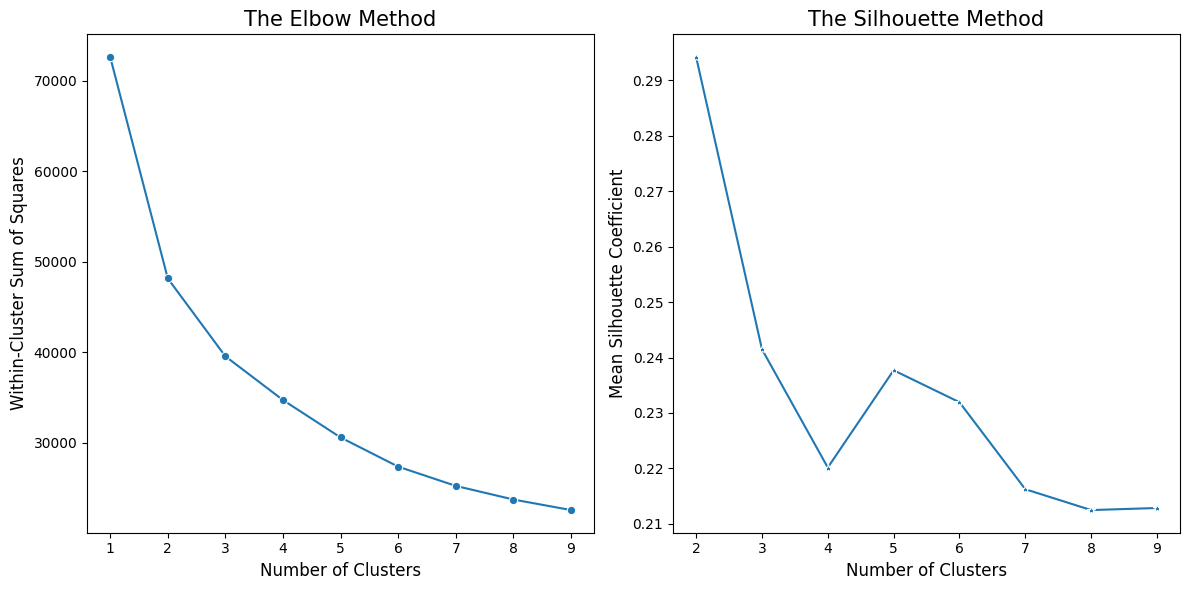

In [59]:
# Suppress FutureWarnings
import warnings  # Import the warnings module
warnings.simplefilter(action='ignore', category=FutureWarning)

# Finding Optimal number of clusters k 
df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

# Perform K-Means clustering and calculate WCSS and silhouette scores
for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)  # Explicitly set n_init
    kmeans.fit(df_feature)
    
    # Calculate WCSS for the Elbow Method
    wcss.append(kmeans.inertia_)
    
    # Calculate the mean Silhouette coefficient for k >= 2
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))

# Plot the Elbow Method and Silhouette Method using Seaborn
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Elbow Method plot
sns.lineplot(x=np.arange(1, max_clusters), y=wcss, marker='o', ax=axs[0])
axs[0].set_xlabel('Number of Clusters', fontsize=12)
axs[0].set_ylabel('Within-Cluster Sum of Squares', fontsize=12)
axs[0].set_title('The Elbow Method', fontsize=15)

# Silhouette Method plot
sns.lineplot(x=np.arange(2, max_clusters), y=sil_score, marker='*', ax=axs[1])
axs[1].set_xlabel('Number of Clusters', fontsize=12)
axs[1].set_ylabel('Mean Silhouette Coefficient', fontsize=12)
axs[1].set_title('The Silhouette Method', fontsize=15)

plt.tight_layout()
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">From the Elbow graph, it is noted that at k = 5, the reduction in the within-cluster sum of squares (WCSS) begins to level off. In the Silhouette graph, the highest score occurs at k = 5 (excluding k = 2).So, 5 clusters will be chosen for the K-Means clustering analysis.

In [60]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# K-Means clustering
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)  # Explicitly set n_init
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster=kmeans.labels_)
customer_with_cluster.value_counts('cluster').sort_index()

cluster
0    1497
1    3349
2    3141
3    2978
4    3563
dtype: int64

In [61]:
customer_with_cluster.sample(5)

,num_received,num_viewed,num_completed,num_transactions,money_spent,cluster
person,,,,,,
ce1579c557c14f7785869dc80638bc0f,3.0,0.0,0.0,0.0,0.00,4
1e6e2ef76ef741309f8e6970e393c6d7,3.0,3.0,2.0,5.0,105.79,2
8c3e347b4de941299355cded147c541c,6.0,3.0,4.0,6.0,128.23,3
20476d940d3a4ac5ab495104ba9b7dd1,3.0,1.0,2.0,8.0,139.48,4
d18d4dffd7324184928d1e918fdfcd8c,4.0,2.0,3.0,4.0,84.08,2


In [62]:
# Aggregate each cluster information and calculate the mean for each feature
cluster_info = customer_with_cluster.groupby('cluster').mean()

cluster_info.round(2)

,num_received,num_viewed,num_completed,num_transactions,money_spent
cluster,,,,,
0,4.81,3.55,2.05,17.25,71.24
1,5.15,4.08,1.24,4.58,43.10
2,3.97,2.92,2.86,8.45,153.93
3,5.32,4.52,4.17,11.59,208.53
4,3.47,2.00,0.78,5.20,42.43


** **

<p style="color:dark pink; font-size:16px;">Checking the clustering results accuracy by using other ML Algorithms 

Classification with Multi-logistic Regression

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [64]:
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)
# Multiclass logistic regression
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

# Check test accurracy
y_predict = log_reg_model.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9955264969029594


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# K-Nearest Neighbors Classification with cross-validation
knn = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')

# Print cross-validated accuracy
print("Cross-validated accuracy:", cv_scores.mean())

Cross-validated accuracy: 0.9739811393840034


<p style="color:blue; font-size:14px; font-family:Verdana;">Both classification methods demonstrated a strong test accuracy, exceeding 97%, when using the labels generated by the K-Means clustering analysis as targets. This suggests that the patterns identified by K-Means clustering within each cluster are distinct enough to be accurately captured by both classification algorithms for more than 97% of the samples.

<br><br><br>

<p style="color:orange; font-size:14px; font-family:Verdana;">Key Metrics for Each Cluster

<p style="color:blue; font-size:14px; font-family:Verdana;">To gain deeper insights into customer behavior within each segment and to inform targeted strategies, the following key metrics are of interest:

<p style="color:blue; font-size:14px; font-family:Verdana;">- Frequency: The total number of transactions made during the campaign month.
<p style="color:blue; font-size:14px; font-family:Verdana;">- Offer Sensitivity: The proportion of transactions involving offers, calculated as the ratio of completed offers to total transactions.
<p style="color:blue; font-size:14px; font-family:Verdana;">- Offer Completion Rate: The overall rate at which offers are completed.
<p style="color:blue; font-size:14px; font-family:Verdana;">- Average Purchase Value: The average dollar amount spent per transaction.




In [67]:
# Create a df for storing required statistics of each cluster
cluster_stats = pd.DataFrame(columns = ['cluster', 'frequency', 'offer_complete_rate', 'offer_sensitivity','avg_purchase_value'])
cluster_stats['cluster'] = index = np.arange(k)
cluster_stats.set_index('cluster', drop = True, inplace = True)

In [68]:
# Add values to df `cluster_stats`
cluster_stats['frequency'] = cluster_info['num_transactions'].round(1)
cluster_stats['offer_sensitivity'] = (cluster_info['num_completed'] / cluster_info['num_transactions']).round(2)
cluster_stats['offer_complete_rate'] = (cluster_info['num_completed'] / cluster_info['num_received']).round(2)
cluster_stats['avg_purchase_value'] = (cluster_info['money_spent'] / cluster_info['num_transactions']).round(1)

In [69]:
cluster_stats

,frequency,offer_complete_rate,offer_sensitivity,avg_purchase_value
cluster,,,,
0,17.3,0.43,0.12,4.1
1,4.6,0.24,0.27,9.4
2,8.4,0.72,0.34,18.2
3,11.6,0.78,0.36,18.0
4,5.2,0.22,0.15,8.2


<p style="color:orange; font-size:16px; font-family:Verdana;">Cluster Interpretation

<p style="color:blue; font-size:14px; font-family:Verdana;">1.Cluster 0: These customers make frequent transactions but spend less per transaction and have a low offer sensitivity.So, I will name them as Regulars.

<p style="color:blue; font-size:14px; font-family:Verdana;">2.Cluster 1: These customers make fewer transactions, but they are moderately sensitive to offers and spend a moderate     amount per transaction.so, they are Occasional Spenders.

<p style="color:blue; font-size:14px; font-family:Verdana;">3.Cluster 2: This group shows moderate transaction frequency but high spending per transaction with strong engagement with  offers.so they have high potential to become our most valuable customers, High Potentials.

<p style="color:blue; font-size:14px; font-family:Verdana;">4.Cluster 3: Customers in this cluster are frequent shoppers who spend a lot and are highly responsive to offers.so,they   are our Most Valuables customers.

<p style="color:blue; font-size:14px; font-family:Verdana;">5.Cluster 4: These customers are infrequent buyers with low spending and low engagement with offers.They can be Low Engagers.


<p style="color:Orange; font-size:16px;">Assigning top 2 percent members into their appropriate cluster

In [70]:
rows_top_money_spent_scaled = scaler_customer_behavior.transform(rows_top_money_spent)

# Predict cluster membership
cluster_kmeans = kmeans.predict(rows_top_money_spent_scaled)

# Count unique cluster memberships
cluster_counts = pd.Series(cluster_kmeans).value_counts().sort_index()

print('According to the KMeans model, customers spending top 2% belong to:')
for cluster_id, count in cluster_counts.items():
    print('{} customers belong to Cluster {}.'.format(count, cluster_id))

According to the KMeans model, customers spending top 2% belong to:
26 customers belong to Cluster 2.
271 customers belong to Cluster 3.


In [71]:
# Create a DataFrame for the top 2% customers
top_2_percent_customers = rows_top_money_spent.copy()
top_2_percent_customers['cluster'] = cluster_kmeans

# Separate customers into different DataFrames based on cluster membership
cluster_2_customers = top_2_percent_customers[top_2_percent_customers['cluster'] == 2]
cluster_3_customers = top_2_percent_customers[top_2_percent_customers['cluster'] == 3]

In [72]:
cluster_2_customers.sample(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent,cluster
person,,,,,,
b153707a382046218a55e0122b4dcf37,2.0,1.0,2.0,5.0,960.21,2
dc736654f1fb4c499f907880699d1233,2.0,2.0,2.0,10.0,904.79,2
e0d0940a726544d29b8c93adf7c39fa2,3.0,1.0,1.0,14.0,472.41,2


In [73]:
cluster_3_customers.sample(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent,cluster
person,,,,,,
41ed54800a2042988866ecd7d971e2e5,5.0,3.0,3.0,12.0,951.53,3
ad1f0a409ae642bc9a43f31f56c130fc,6.0,5.0,3.0,5.0,1258.19,3
fe97aa22dd3e48c8b143116a8403dd52,5.0,5.0,1.0,11.0,562.77,3


In [74]:
# Concatenate the DataFrames
combined_df1 = pd.concat([customer_with_cluster,cluster_2_customers])
combined_df2 = pd.concat([combined_df1,cluster_3_customers])

In [75]:
combined_df2.sample(3)

,num_received,num_viewed,num_completed,num_transactions,money_spent,cluster
person,,,,,,
c4cc8a7a10fa402dae9508b47373117d,5.0,3.0,2.0,17.0,47.21,0
2cec68f40dd4472aaebddeb1308e8a61,4.0,2.0,4.0,15.0,193.33,2
9daa8e32286143da85f85846cb35a259,4.0,3.0,4.0,4.0,114.23,2


In [76]:
combined_df2.shape

(14825, 6)

<p style="color:orange; font-size:16px;">Joining the combined data frame with customers data so, that we can get the average demographics of each cluster

In [77]:
# Set 'person' as the index in the customers DataFrame to prepare for join
customers.set_index('id', inplace=True)

In [78]:
# Reset index to ensure `person` is a column in `combined_df`
combined_df2 = combined_df2.reset_index()

# Join the DataFrames
customer_behavior_profile = pd.merge(combined_df2, customers, left_on='person', right_on='id')

# Verify the join
customer_behavior_profile.head()

,person,num_received,num_viewed,num_completed,num_transactions,money_spent,cluster,gender,age,became_member_on,income,age_group,income_group
0,0009655768c64bdeb2e877511632db8f,5.0,4.0,3.0,8.0,127.60,2,M,33,20170421,72000.0,30-40yrs,70-90k
1,0011e0d4e6b944f998e987f904e8c1e5,5.0,5.0,3.0,5.0,79.46,1,O,40,20180109,57000.0,30-40yrs,50-70k
2,0020c2b971eb4e9188eac86d93036a77,5.0,3.0,3.0,8.0,196.86,2,F,59,20160304,90000.0,50-60yrs,70-90k
3,0020ccbbb6d84e358d3414a3ff76cffd,4.0,4.0,3.0,12.0,154.05,2,F,24,20161111,60000.0,18-30yrs,50-70k
4,003d66b6608740288d6cc97a6903f4f0,5.0,4.0,3.0,18.0,48.34,0,F,26,20170621,73000.0,18-30yrs,70-90k


In [79]:
# Define a mapping function for cluster aliases
def map_cluster_alias(cluster):
    mapping = {
        3: 'Most-Valables',
        0: 'Regulars',
        2: 'High-Potentials',
        1: 'Ocasional-Spenders',
        4: 'Low-Engagers'
    }
    return mapping.get(cluster, 'Unknown')

# Add column `cluster_alias` using the mapping function
customer_behavior_profile['cluster_alias'] = customer_behavior_profile['cluster'].apply(map_cluster_alias)

# Display the first 3 rows
customer_behavior_profile.head(3)

,person,num_received,num_viewed,num_completed,num_transactions,money_spent,cluster,gender,age,became_member_on,income,age_group,income_group,cluster_alias
0,0009655768c64bdeb2e877511632db8f,5.0,4.0,3.0,8.0,127.60,2,M,33,20170421,72000.0,30-40yrs,70-90k,High-Potentials
1,0011e0d4e6b944f998e987f904e8c1e5,5.0,5.0,3.0,5.0,79.46,1,O,40,20180109,57000.0,30-40yrs,50-70k,Ocasional-Spenders
2,0020c2b971eb4e9188eac86d93036a77,5.0,3.0,3.0,8.0,196.86,2,F,59,20160304,90000.0,50-60yrs,70-90k,High-Potentials


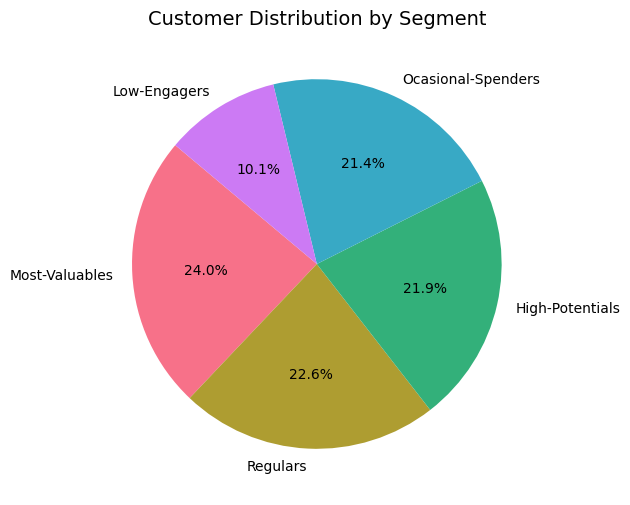

In [80]:
# Calculate the percentage distribution of each cluster
cluster_counts = customer_behavior_profile['cluster'].value_counts()
cluster_percent = (cluster_counts / cluster_counts.sum() * 100).round(2)
cluster_names = ['Most-Valuables', 'Regulars', 'High-Potentials', 'Ocasional-Spenders', 'Low-Engagers']


%matplotlib inline

# Plot pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(cluster_counts, labels=cluster_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(cluster_names)))

plt.title('Customer Distribution by Segment', fontsize=14)
plt.show()

<p style="color:blue; font-size:14px; font-family:Verdana;">Key Insights

<p style="color:blue; font-size:14px; font-family:Verdana;">1. Balanced Distribution:
The customer base appears fairly evenly distributed across segments, with no single group dominating. This suggests a diverse customer base with varied engagement levels and spending habits.

<p style="color:blue; font-size:14px; font-family:Verdana;">2. Significant "Most-Valuables" Segment:
The "Most-Valuables" segment comprises 24% of customers - the largest single group. This is a positive sign, indicating a substantial portion of high-value, loyal customers who likely contribute disproportionately to revenue.

<p style="color:blue; font-size:14px; font-family:Verdana;">3. Growth Potential:
The "High-Potentials" (21.9%) and "Occasional-Spenders" (21.4%) segments together make up over 43% of customers. This represents a significant opportunity for increasing engagement and spending through targeted marketing and loyalty programs.

<p style="color:blue; font-size:14px; font-family:Verdana;">4. Steady Core:
The "Regulars" segment at 22.6% suggests a solid base of consistent customers. While not the highest spenders, they provide stable revenue and could be targeted for upselling.

<p style="color:blue; font-size:14px; font-family:Verdana;">5. Engagement Challenge:
The "Low-Engagers" at 10.1% represent customers at risk of churn. While the smallest segment, it's still a notable portion that requires attention to re-engage or prevent further disengagement.

In [81]:
#Average demographics of each segment
cluster_avg = customer_behavior_profile.groupby('cluster_alias').agg({'age': 'mean', 'income': 'mean'})

cluster_avg.round(2).head()

,age,income
cluster_alias,,
High-Potentials,57.58,73818.76
Low-Engagers,52.60,60911.31
Most-Valables,56.30,71676.52
Ocasional-Spenders,54.53,63550.91
Regulars,47.46,48837.01


<p style="color:Orange; font-size:14px; font-family:Verdana;">1.High-Potentials:
<p style="color:blue; font-size:14px; font-family:Verdana;">These customers are older and have the highest average income. They're likely established professionals or retirees with significant disposable income. Their high income suggests they have the potential to become very valuable customers if Starbucks can increase their engagement and spending.

<p style="color:Orange; font-size:14px; font-family:Verdana;">2.Low-Engagers:
<p style="color:blue; font-size:14px; font-family:Verdana;">This group is middle-aged with a moderate income. Their lower engagement might be due to busier lifestyles, preference for home-brewed coffee, or being more price-sensitive despite having a decent income.

<p style="color:Orange; font-size:14px; font-family:Verdana;">3.Most-Valuables:
<p style="color:blue; font-size:14px; font-family:Verdana;">Similar to High-Potentials in age and income, these customers are likely already frequent Starbucks patrons. Their high value could stem from regular visits, purchasing premium products, or using Starbucks for business meetings.

<p style="color:Orange; font-size:14px; font-family:Verdana;">4.Occasional-Spenders:
<p style="color:blue; font-size:14px; font-family:Verdana;"> group has an above-average age and income. They might view Starbucks as a treat rather than a daily necessity, possibly due to budget consciousness or varied coffee preferences.

<p style="color:Orange; font-size:14px; font-family:Verdana;">5.Regulars:
<p style="color:blue; font-size:14px; font-family:Verdana;">The youngest group with the lowest average income. These could be younger professionals or families who have made Starbucks a part of their daily routine, possibly valuing convenience and the social aspect of coffee shops despite having less disposable income.

<br><br><br><br>

**5.RESULTS SUMMARY:**  <a class="anchor" id="5-results-summary"></a>

1. **Customer Engagement and Loyalty:**
The high transaction volume (138,953) compared to completed offers (33,579) suggests strong customer loyalty and frequent purchasing behavior, typical for a fast-moving consumer goods (FMCG) business like Starbucks. This indicates that many customers make purchases without relying on promotional offers.


2. **Offer Effectiveness:**
The campaign showed good overall engagement, with 76% of distributed offers being viewed and 44% being completed.
Discount offers (particularly F and E) outperformed "Buy One Get One" (BOGO) offers in terms of completion rates, indicating a customer preference for straightforward discounts.
Offer duration positively correlated with completion rates, suggesting that longer-running promotions give customers more opportunity to participate.


3. **Channel Optimization:**
The effectiveness of promotional channels, in order of view rates, is:
Social Media > Email ≥ Mobile > Websites
Offers utilizing all four channels (web, email, mobile, social) achieved the highest view rates (around 96%), highlighting the importance of a multi-channel approach.


4. **Offer Design Considerations:**
Lower difficulty levels in offers generally led to better completion rates.
The reward size did not significantly impact completion rates, suggesting that ease of redemption may be more important than the size of the reward.
Informational offers (I and J) had varied view rates but no completion metrics, indicating their role in customer education rather than direct sales.


5. **Top-Performing Offers:**
Offers F, E, and B had the highest completion rates (70%, 68%, and 56% respectively), providing models for future promotional designs.

<br>

**Customer Demographics:**

1. Gender Distribution: The majority of Starbucks customers are male (57.2%), followed by females (41.3%) and a small percentage representing other genders (1.4%). This skew toward male customers might be reflective of broader consumer trends in coffee consumption or could indicate opportunities for targeted marketing campaigns to further engage female customers and those identifying as other genders.

2. Age Distribution: The largest customer age group is between 50-60 years (24.3%), followed by 60-70 years (19.7%), and 40-50 years (16.2%). Together, these three age groups represent over 60% of the customer base, suggesting that Starbucks appeals significantly to middle-aged and older adults. This could be due to factors like higher disposable income, brand loyalty, and a preference for premium experiences that align with their lifestyle. However, younger age groups (18-30 years and 30-40 years) show lower engagement, indicating a potential area for growth through targeted marketing and product offerings tailored to their preferences.

3.  Income Distribution: The most significant portion of Starbucks customers earn between `$50,000` and `$70,000` (34%), followed by those earning `$30,000` to `$50,000` (26.8%) and `$70,000` to `$90,000` (24.4%). This suggests that Starbucks' customer base is primarily middle-income to high-income, with customers in these brackets being able to afford premium products without viewing them as overly expensive. The relatively smaller percentage of customers earning above `$90,000` indicates that while Starbucks attracts middle-income customers, it remains a brand with broad appeal across various income levels.

<br>

**Cluster Distribution and Significance:**

-  **Most-Valuables:** Already loyal and high-spending, likely due to regular visits or use of premium services.
-  **Regulars:** Younger, lower-income group, consistent but low-spending.
-  **High-Potentials:** High income but moderate engagement, presenting an opportunity to convert them into top-tier customers.
-  **Occasional-Spenders:** Above-average age and income, suggesting that they view Starbucks as an occasional indulgence.
-  **Low-Engagers:** Middle-aged with moderate income, indicating potential barriers like price sensitivity or lifestyle preferences.

The customer base is evenly distributed across five distinct segments, each representing different levels of engagement and spending behavior.
The "Most-Valuables" segment is the largest **(24%)**, followed closely by "High-Potentials" **(21.9 %)** and "Occasional-Spenders" **(21.4%)**. These three segments collectively account for a substantial portion of revenue.The "Regulars" **(22.6%)** offer consistent revenue, while "Low-Engagers" **(10.1%)** represent a group at risk of churn.

**Demographics:**
Age and Income Insights: The "Most-Valuables" and "High-Potentials" are older, with higher average incomes, while the "Regulars" are younger with the lowest income.

<br><br><br>

**6.ACTIONS AND RECOMMENDATIONS**  <a class="anchor" id="6-actions-and-recommendations"></a>

Optimizing Offer Strategies for Better Customer Engagement.Offers not only drive immediate sales but also enhance customer loyalty. Although the impact of each offer is brief, effective strategies can maximize their long-term benefits:

1.   Multi-Channel Promotion:Use various channels, especially social media and email, to increase offer visibility and engagement.
   
2.   Prioritize Discount Offers:Focus on discounts rather than BOGO deals, as they tend to resonate better with customers and lead to higher completion rates.

3.   Simplify and Extend Offers:Design offers that are easy to redeem and have longer durations. This approach reduces barriers and gives customers more time to take advantage of the promotions.
   
These strategies can help boost immediate revenue while building long-term customer loyalty.

4.Demographic Targeting:
   - Consider targeted marketing campaigns to further engage female customers, as well as those identifying as other genders, to balance the gender distribution.
   - Introduce Couple Offers and Themed Promotions: Create special offers for couples, such as "Buy One, Get One" deals or discounts on shared items, combined with themes focused on love and dates. These promotions can be centered around specific dates like Valentine's Day or "Date Nights," and can be integrated into the overall ambiance of the store. This strategy is likely to attract younger customers by setting a trend. 
     
5.Customer Segment Targeted Marketing:

- Increase Engagement in "High-Potentials": Tailor campaigns to this segment by promoting premium offerings and loyalty programs that reward frequent visits, aiming to boost their engagement and spending.
- Re-engage "Low-Engagers": Develop personalized offers that align with their price sensitivity and preferences, such as discounts on staple products or subscription services.

- Loyalty and Upselling:Enhance "Most-Valuables" Experience: Introduce exclusive benefits, such as early access to new products or premium seating, to maintain their loyalty and encourage additional spending.

- Upsell to "Regulars": Create campaigns that focus on upgrading their purchase experience, like offering bundled deals or premium options at a discounted rate.

- Channel Optimization:Social Media and Email Marketing: Continue leveraging these channels, especially for "High-Potentials" and "Most-Valuables," to drive engagement and brand loyalty through personalized and interactive content.

- Product and Service Customization:Design Offers Based on Cluster Insights: Customize offers that match each segment’s unique profile, such as budget-friendly deals for "Low-Engagers" and premium experiences for "High-Potentials" and "Most-Valuables."

<br><br><br>

**    **

**    **

**   **